# Amazon Customer Data Analysis

## 1. Preparing for Data Analysis

In [387]:
# Importing necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset Information:
    
##### Id
##### ProductId — unique identifier for the product
##### UserId — unqiue identifier for the user
##### ProfileName
##### HelpfulnessNumerator — number of users who found the review helpful
##### HelpfulnessDenominator — number of users who indicated whether they found the review helpful or not
##### Score — rating between 1 and 5
##### Time — timestamp for the review
##### Summary — brief summary of the review
##### Text — text of the review

## Reading data from SQLite Database

In [390]:
import sqlite3

In [391]:
con = sqlite3.connect("/Users/glen/Downloads/amazon_customer_data/database.sqlite")

In [392]:
df = pd.read_sql_query("SELECT * FROM REVIEWS" , con)

In [393]:
df.shape

(568454, 10)

# 2. Data Pre-processing / Cleaning

In [395]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [396]:
'''
'HelpfulnessNumerator' is the number of users who found the review helpful, which must be less than 'HelpfulnessDenominator' 
which is the number of users who indicated whether they found the review helpful or not.
'''

"\n'HelpfulnessNumerator' is the number of users who found the review helpful, which must be less than 'HelpfulnessDenominator' \nwhich is the number of users who indicated whether they found the review helpful or not.\n"

In [397]:
# Determining which are the invalid rows:
df[df['HelpfulnessNumerator'] > df['HelpfulnessDenominator']]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [398]:
# Including only valid rows:
df_valid = df[df['HelpfulnessNumerator'] <= df['HelpfulnessDenominator']]

In [399]:
df_valid.shape

(568452, 10)

In [400]:
df_valid.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [401]:
# Checking for duplicate rows
df_valid.duplicated(['UserId', 'ProfileName', 'Time', 'Text']) #columns that determine duplicates

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568452, dtype: bool

In [402]:
df_valid[df_valid.duplicated(['UserId', 'ProfileName' ,'Time' ,'Text'])]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
29,30,B0001PB9FY,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...
574,575,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,2,2,5,1231718400,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh..."
1973,1974,B0017165OG,A2EPNS38TTLZYN,tedebear,0,0,3,1312675200,Pok Chops,The pork chops from Omaha Steaks were very tas...
2309,2310,B0001VWE0M,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
2323,2324,B0001VWE0C,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
...,...,...,...,...,...,...,...,...,...,...
568409,568410,B0018CLWM4,A2PE0AGWV6OPL7,Dark Water Mermaid,3,3,5,1309651200,Quality & affordable food,I was very pleased with the ingredient quality...
568410,568411,B0018CLWM4,A88HLWDCU57WG,R28,2,2,5,1332979200,litter box,My main reason for the five star review has to...
568411,568412,B0018CLWM4,AUX1HSY8FX55S,DAW,1,1,5,1319500800,Happy Camper,I bought this to try on two registered Maine C...
568412,568413,B0018CLWM4,AVZ2OZ479Q9E8,Ai Ling Chow,0,0,5,1336435200,Two Siberians like it!,When we brought home two 3-month-old purebred ...


In [403]:
'''
This means that there are 174521 rows of duplicate data that we have to drop
'''

'\nThis means that there are 174521 rows of duplicate data that we have to drop\n'

In [404]:
data = df_valid.drop_duplicates(subset=['UserId', 'ProfileName' ,'Time' ,'Text'])

In [405]:
data.shape

(393931, 10)

In [406]:
data.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [407]:
# Converting 'Time' from int64 to date-time

In [408]:
data['Time']

0         1303862400
1         1346976000
2         1219017600
3         1307923200
4         1350777600
             ...    
568449    1299628800
568450    1331251200
568451    1329782400
568452    1331596800
568453    1338422400
Name: Time, Length: 393931, dtype: int64

In [409]:
data['Time'] = pd.to_datetime(data['Time'] , unit='s')

In [410]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

## 3. Analysing To What User Amazon Can Recommend More Products

#### Amazon can recommend more products to those who are going to buy more, or to an individual with a better conversion rate

In [413]:
# Total no. of users
data['UserId'].nunique()

256059

##### Determine the number of summaries, number of texts, average of scores, and number of products purchased for each UserId

In [415]:
recommend_df = data.groupby(['UserId']).agg({'Summary':'count' , 'Text':'count' , 'Score':'mean' ,'ProductId':'count'  }).sort_values(by='ProductId' , ascending=False)

In [416]:
recommend_df.columns = ['No_Of_Summaries' , 'No_Text' , 'Avg_Score' , 'No_Of_Prods_Purchased']

In [417]:
recommend_df.head()

,No_Of_Summaries,No_Text,Avg_Score,No_Of_Prods_Purchased
UserId,,,,
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,278,278,4.546763,278
A281NPSIMI1C2R,259,259,4.787645,259
A1YUL9PCJR3JTY,214,214,4.621495,214
A1Z54EM24Y40LL,211,211,4.383886,211


##### Determining the Top 10 Users

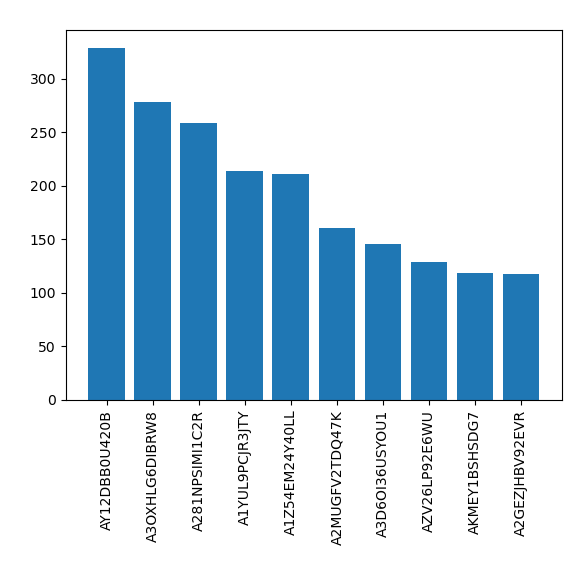

In [419]:
plt.bar(recommend_df.index[0:10] , recommend_df['No_Of_Prods_Purchased'][0:10].values)
plt.xticks(rotation='vertical')
plt.title("Products Purchased", color = "white")
plt.xlabel("UserID", color = "white")
plt.ylabel("Number of Products", color = "white")
plt.show()

In [ ]:
'''
Inference: These are the Top 10 Users with the highest number of products purchased. Amazon should recommend more products to them as
there is a high likelihood that these people are going to purchase more.
'''

## 4. Determining Which Product Has A Good Number Of Reviews

In [422]:
# Number of Products in the dataset
len(data['ProductId'].unique()) 

67624

#### Finding The Highest Sold Products

In [424]:
prod_count = data['ProductId'].value_counts()

In [425]:
prod_count

ProductId
B007JFMH8M    912
B002QWP89S    630
B003B3OOPA    622
B001EO5Q64    566
B0013NUGDE    558
             ... 
B002DNX4GO      1
B000FM2YU2      1
B001M1VA32      1
B009858H6M      1
B001LR2CU2      1
Name: count, Length: 67624, dtype: int64

#### Let a product be considered highly sold if it is sold at least 500 times

In [427]:
most_freq = prod_count[prod_count >500]
most_freq.to_frame()

,count
ProductId,
B007JFMH8M,912
B002QWP89S,630
B003B3OOPA,622
B001EO5Q64,566
B0013NUGDE,558
B000KV61FC,556
B000UBD88A,542
B000NMJWZO,542
B005K4Q37A,541


In [428]:
freq_prod_ids = most_freq.index
freq_prod_ids

Index(['B007JFMH8M', 'B002QWP89S', 'B003B3OOPA', 'B001EO5Q64', 'B0013NUGDE',
       'B000KV61FC', 'B000UBD88A', 'B000NMJWZO', 'B005K4Q37A', 'B0090X8IPM',
       'B005ZBZLT4'],
      dtype='object', name='ProductId')

In [429]:
freq_prod = data[data['ProductId'].isin(freq_prod_ids)]
freq_prod

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
20982,20983,B002QWP89S,A21U4DR8M6I9QN,"K. M Merrill ""justine""",1,1,5,2011-10-18,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...
20983,20984,B002QWP89S,A17TDUBB4Z1PEC,jaded_green,1,1,5,2011-10-14,genuine Greenies best price,"These are genuine Greenies product, not a knoc..."
20984,20985,B002QWP89S,ABQH3WAWMSMBH,tenisbrat87,1,1,5,2011-09-28,Perfect for our little doggies,"Our dogs love Greenies, but of course, which d..."
20985,20986,B002QWP89S,AVTY5M74VA1BJ,tarotqueen,1,1,5,2011-09-24,dogs love greenies,"What can I say, dogs love greenies. They begg ..."
20986,20987,B002QWP89S,A13TNN54ZEAUB1,dcz2221,1,1,5,2011-09-23,Greenies review,This review is for a box of Greenies Lite for ...
...,...,...,...,...,...,...,...,...,...,...
563878,563879,B007JFMH8M,A366PSH7KFLRPB,TheRosySnail,0,0,5,2012-07-29,Yummy!,I loved these cookies and so did my kids. You ...
563879,563880,B007JFMH8M,A2KV6EYQPKJRR5,Kelley,0,0,5,2012-07-28,Quaker Soft Baked Cookies,This is a great tasting cookie. It is very sof...
563880,563881,B007JFMH8M,A3O7REI0OSV89M,Esme,0,0,4,2012-07-28,Delicious!,These are great for a quick snack! They are sa...
563881,563882,B007JFMH8M,A9JS5GQQ6GIQT,Syne,0,0,5,2012-07-28,yummy,I love the Quaker soft baked cookies. The rea...


<Axes: xlabel='count', ylabel='ProductId'>

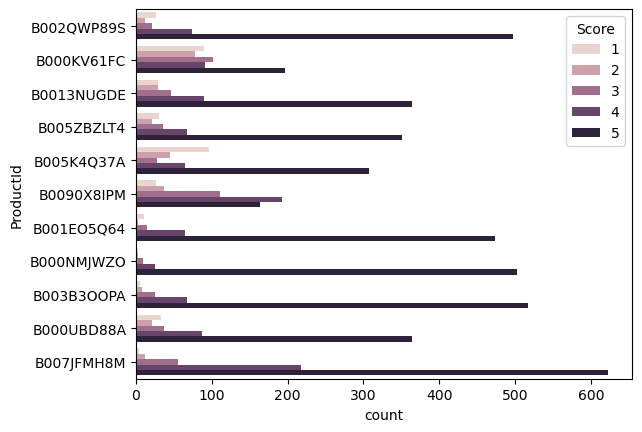

In [430]:
plt.style.use('default')
sns.countplot(y = 'ProductId' , data = freq_prod , hue='Score')

## Determining If There Is A Difference Between Behavior of Frequent Viewers & Non-Frequent Viewers 

#### Let Frequent viewers be those who have bought products at least 50 times

In [433]:
purchase_count = data['UserId'].value_counts()
purchase_count.head()

UserId
AY12DBB0U420B     329
A3OXHLG6DIBRW8    278
A281NPSIMI1C2R    259
A1YUL9PCJR3JTY    214
A1Z54EM24Y40LL    211
Name: count, dtype: int64

In [434]:
data['ViewerType'] = data['UserId'].apply(lambda x : "Frequent" if purchase_count[x]>50 else "Not Frequent")

In [435]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ViewerType
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent


In [480]:
non_freq_df = data[data['ViewerType'] == 'Not Frequent']
freq_df = data[data['ViewerType'] == 'Frequent']

In [482]:
freq_df['Score'].value_counts()/len(freq_df)*100

Score
5    61.605044
4    21.147681
3     9.585381
2     3.932464
1     3.729429
Name: count, dtype: float64

In [484]:
non_freq_df['Score'].value_counts()/len(non_freq_df)*100

Score
5    63.757986
4    14.071191
1     9.349850
3     7.507547
2     5.313426
Name: count, dtype: float64

<Axes: xlabel='Score'>

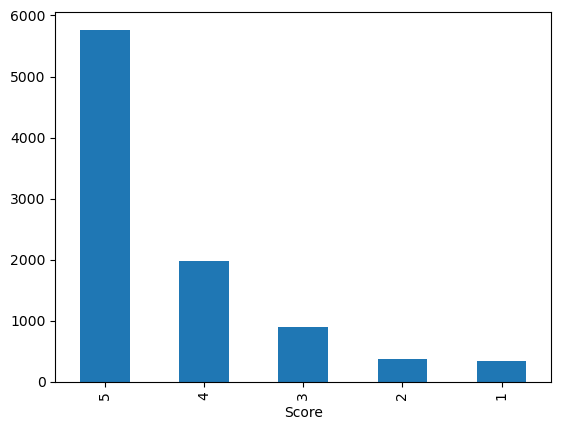

In [486]:
freq_df['Score'].value_counts().plot(kind='bar')

<Axes: xlabel='Score'>

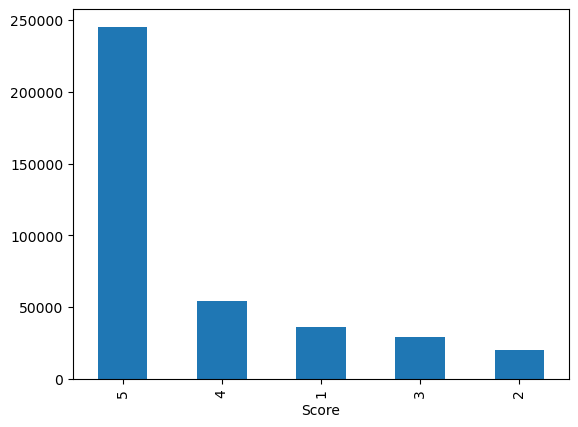

In [490]:
non_freq_df['Score'].value_counts().plot(kind='bar')

In [492]:
'''
Frequent reviewers are more discerning in that they give less 5-star and 1-star reviews compared to the Non-Frequent reviewers
'''

'\nFrequent reviewers are more discerning in that they give less 5-star and 1-star reviews compared to the Non-Frequent reviewers\n'

## Sentiment Analysis

In [497]:
!pip install textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 1.2 MB/s eta 0:00:00a 0:00:01


In [499]:
from textblob import TextBlob

In [503]:
data.shape

(393931, 11)

In [511]:
# Using sample data due to large dataset
sample = data.sample(n=50000, random_state=42)
sample.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ViewerType
126518,126519,B000EGZ97Y,A1UWZBVFPR21G8,Jennifer L. Wilford,1,1,5,2009-03-08,Love Sticky Rice!,Rice Select Sushi Rice is a great way to serve...,Not Frequent
514654,514655,B0005ZVD8S,A214U1X70CG6ME,"Robert H. Hart III ""child of the corned beef ...",2,3,5,2007-05-17,Life-changing Hash,I was a bit skeptical to see a can of corned b...,Not Frequent
159263,159264,B00513WFVS,A34EQ0RL534U3I,BeStrong,1,1,5,2011-12-28,OMG! These are so addictive!!,If you've ever had pickled okra and they were ...,Not Frequent


In [513]:
polarity = []

for text in sample['Summary']:
    try:
        polarity.append(TextBlob(text).sentiment.polarity)
    except:
        polarity.append(0)

In [515]:
sample['Polarity'] = polarity

In [517]:
sample.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ViewerType,Polarity
126518,126519,B000EGZ97Y,A1UWZBVFPR21G8,Jennifer L. Wilford,1,1,5,2009-03-08,Love Sticky Rice!,Rice Select Sushi Rice is a great way to serve...,Not Frequent,0.625
514654,514655,B0005ZVD8S,A214U1X70CG6ME,"Robert H. Hart III ""child of the corned beef ...",2,3,5,2007-05-17,Life-changing Hash,I was a bit skeptical to see a can of corned b...,Not Frequent,0.000
159263,159264,B00513WFVS,A34EQ0RL534U3I,BeStrong,1,1,5,2011-12-28,OMG! These are so addictive!!,If you've ever had pickled okra and they were ...,Not Frequent,0.000
275657,275658,B004Q44NPO,A1XNMF77GJ8V8S,EJ,1,1,2,2011-06-06,Too much sodium,Amazon did not post nutrition information for ...,Not Frequent,0.200
261470,261471,B0017T6S1I,ACELKH5KHQ752,"R. Mallozzi ""eclectic reader""",1,1,5,2010-09-17,Perfect flavored tea,This is the perfect cold tea drink. It has wo...,Not Frequent,1.000


In [525]:
sample_neg = sample[sample['Polarity'] < 0]
sample_pos = sample[sample['Polarity'] > 0]
sample_neg.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ViewerType,Polarity
376826,376827,B00014FGHC,A13LRS8QB0QE33,GATITAxCHICANA,0,0,5,2010-12-08,Bust that cold,"I love this tea, it's a staple in our househol...",Not Frequent,-0.600000
498072,498073,B000BYAECY,A6E8G4DVYEQY9,adrianna,2,2,1,2012-02-01,Terrible All Around!!!,i was expecting something like a bunch of bull...,Not Frequent,-1.000000
40824,40825,B0016HCNG0,A19FXQDNPJPLAE,Moose,0,0,1,2011-09-02,"Bad, Old, Products... Hartz sells these as Cru...",This product that I recieved was old... My dog...,Not Frequent,-0.009028
139836,139837,B0061IUKDM,A13WOT3RSXKRD5,LD,1,1,4,2012-03-29,For the tea lover who likes tea with a small bite,Green tea is smooth and very mild with just a ...,Not Frequent,-0.250000
203690,203691,B002GWFAM8,A35MLF25AC35YK,G. Donaldson,1,3,1,2012-08-07,Coffee Bean Direct Dark Sumatran Gayoland,Mini-charcoal briquets: This Sumatran whole-b...,Not Frequent,-0.025000


In [521]:
from collections import Counter

##### Most Used Negative Keywords:

In [527]:
Counter(sample_neg['Summary']).most_common(10)

[('Disappointed', 40),
 ('Disappointing', 27),
 ('disappointed', 17),
 ('Not what I expected', 17),
 ('Disgusting', 14),
 ('Awful', 14),
 ('Horrible', 12),
 ('Not good', 11),
 ('Not Good', 11),
 ('Hard to find', 9)]

##### Most Used Positive Keywords:

In [529]:
Counter(sample_pos['Summary']).most_common(10)

[('Delicious!', 249),
 ('Delicious', 206),
 ('Great product', 100),
 ('Great Product', 85),
 ('Excellent', 83),
 ('Love it!', 81),
 ('Great!', 60),
 ('Good Stuff', 55),
 ('Great', 54),
 ('Awesome!', 51)]